# Stability Analysis of GFE

In [1]:
using LinearAlgebra
using Plots

function softmax(v::Vector)
    r = v .- maximum(v)
    clamp!(r, -100.0, 0.0)
    exp.(r)./sum(exp.(r))
end

tiny = 1e-12
;

# Model

In [2]:
A = [0.98 0.02; 
     0.02 0.98]

c = [0.5, 0.5]

d = [0.2, 0.8]

s_0 = [0.9, 0.1] # Initial coordinate

f(s) = softmax(log.(d .+ tiny) + diag(A'*log.(A) .+ tiny) + A'*log.(c .+ tiny) - A'*log.(A*s .+ tiny))
F(s) = -s'*log.(d .+ tiny) + s'*log.(s .+ tiny) - s'*diag(A'*log.(A) .+ tiny) - (A*s)'*log.(c .+ tiny) + (A*s)'*log.(A*s .+ tiny)
;

# Results

In [3]:
n_its = 5
G = zeros(n_its)
p = Vector{Float64}(undef, n_its) # Coordinates

G_0 = F(s_0)
s_k_min = s_0
for k=1:n_its
    s_k = f(s_k_min)

    p[k] = s_k[1]
    G[k] = F(s_k)

    s_k_min = s_k
end

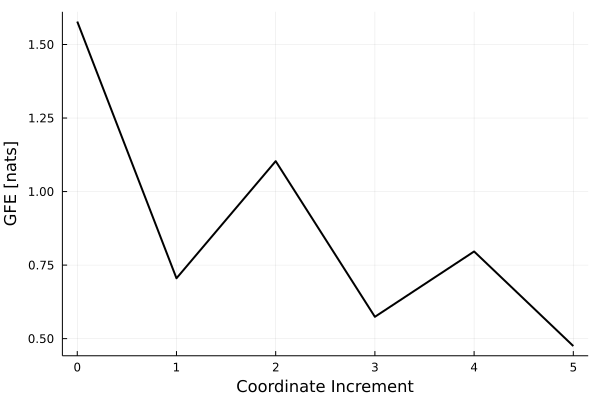

In [4]:
plot(0:n_its, [G_0; G], color=:black, grid=true, linewidth=2, legend=false, xlabel="Coordinate Increment", ylabel="GFE [nats]")

# Landscape

In [5]:
ps = 0.0:0.05:1.0
m = length(ps)
Gs = zeros(m)
for i = 1:m
    Gs[i] = F([ps[i], 1.0-ps[i]])
end

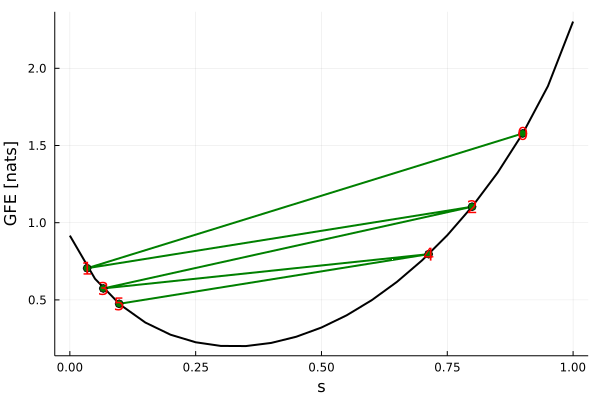

In [6]:
plt = plot(ps,
           Gs,
           dpi=100,
           xlabel="s",
           ylabel="GFE [nats]", color=:black, linewidth=2)

p_0 = s_0[1]
plot!([p_0; p], [G_0; G], color=:green, marker=:o, linewidth=2, legend=false)

for k=1:n_its+1
    ann = ([p_0; p][k], [G_0; G][k], text(k-1, 12, :red, :center))
    annotate!(ann, linecolor=:red)
end

plt

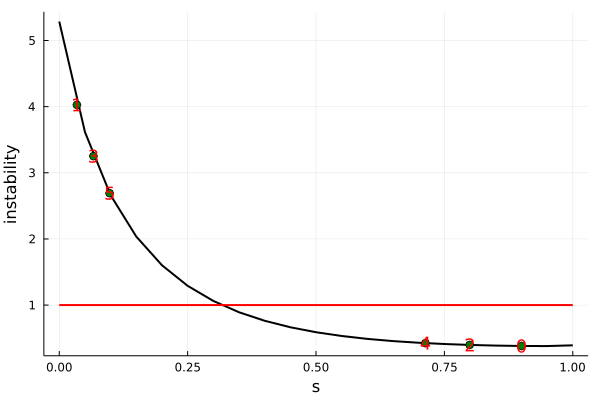

In [7]:
using ForwardDiff

h(p) = norm(ForwardDiff.jacobian(f, [p, 1.0-p])) # Frobenius norm of Jacobian
plt = plot(ps, h.(ps), color=:black, linewidth=2, legend=false, xlabel="s", ylabel="instability")
plot!([0.0, 1.0], [1.0, 1.0], color=:red, linewidth=2, legend=false)
scatter!([p_0; p], h.([p_0; p]), color=:green, marker=:o, linewidth=2, legend=false)
for k=1:n_its+1
    p_k = [p_0; p][k]
    ann = (p_k, h(p_k), text(k-1, 12, :red, :center))
    annotate!(ann, linecolor=:red)
end

plt